#      Stroke Prediction Dataset
####     11 clinical features for predicting stroke events

##### (Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Pasaulio sveikatos organizacijos (PSO) duomenimis, insultas yra antroji pagrindinė mirties priežastis pasaulyje, dėl kurios atsiranda maždaug 11% visų mirčių. Šis duomenų rinkinys naudojamas prognozuoti, ar pacientas gali susirgti insultu, remiantis įvesties parametrais, tokiais kaip lytis, amžius, įvairios ligos ir rūkymo būsena. Kiekvienoje duomenų eilutėje pateikiama atitinkama informacija apie pacientą.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
import random
from scipy import stats

import os
os.getcwd()

## Duomenų analizė

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv.xls")

In [4]:
len(df)

5110

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe().round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

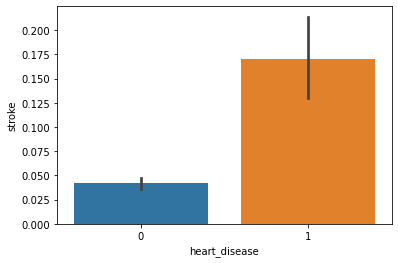

In [8]:
sns.barplot(x='heart_disease', y='stroke', data=df)

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

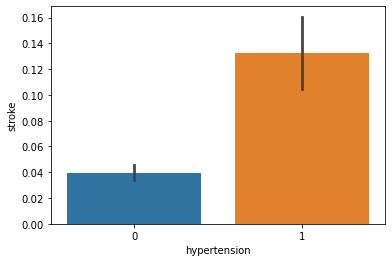

In [9]:
sns.barplot(x='hypertension', y='stroke', data=df)

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

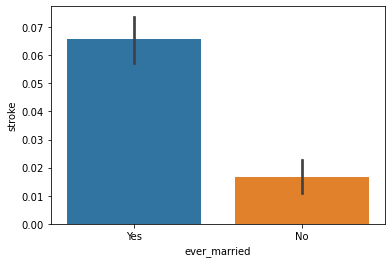

In [10]:
sns.barplot(x='ever_married', y='stroke', data=df)

#### Insulto, širdies ligų ir kraujospudžio ryšys su amžiumi

<AxesSubplot:xlabel='age', ylabel='Count'>

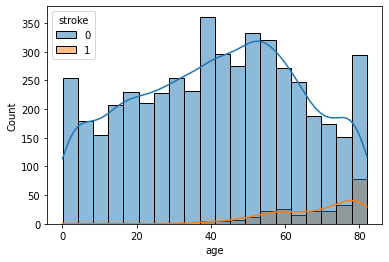

In [11]:
sns.histplot(data=df, x="age", hue = "stroke", kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

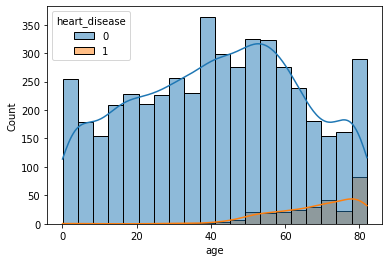

In [12]:
sns.histplot(data=df, x="age", hue = "heart_disease", kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

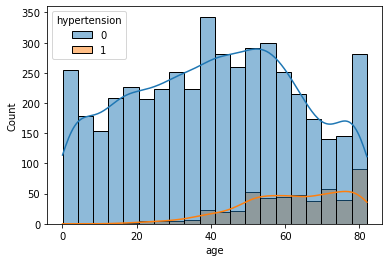

In [13]:
sns.histplot(data=df, x="age", hue = "hypertension", kde=True)

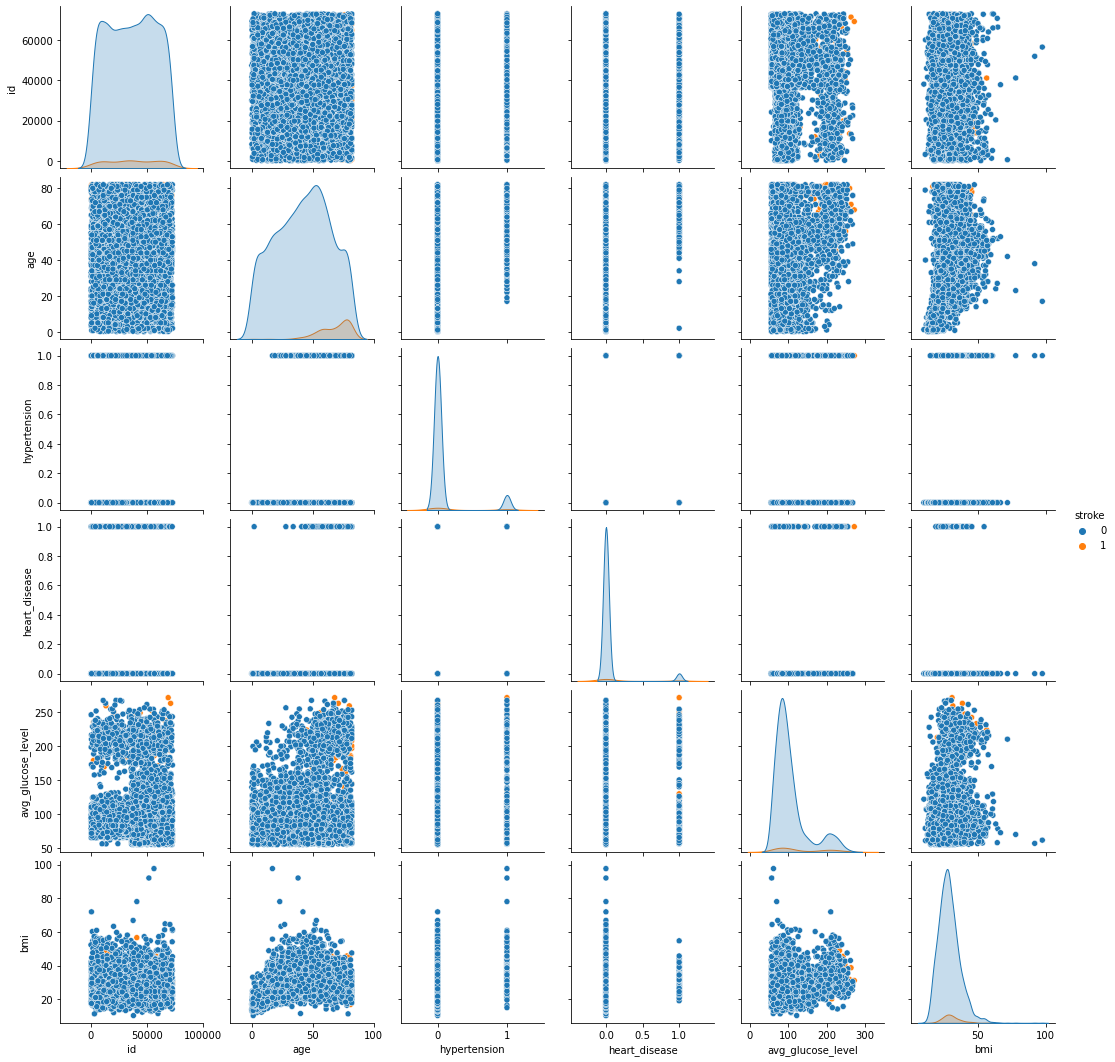

In [16]:
sns.pairplot(df, hue = 'stroke')

### Insultą, širdies ligas ir kraujospudį turinčių pacientų skaičius

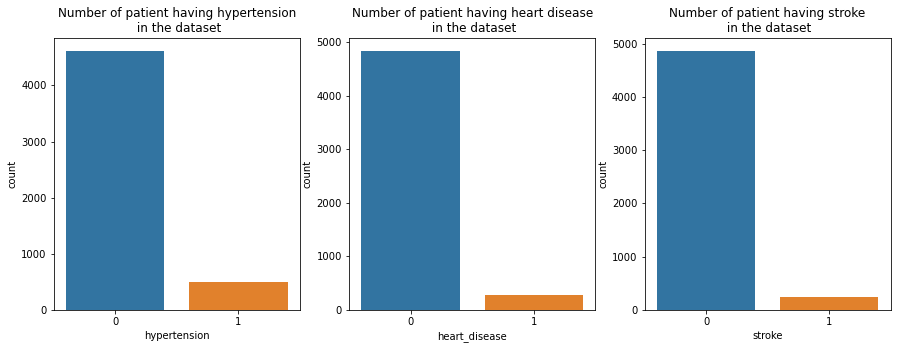

In [17]:
df_age = df.loc[df['age'].between(0, 90)]
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize =(15,5) )
sns.countplot(x='hypertension', data=df_age, ax=ax1)
sns.countplot(x='heart_disease', data=df_age, ax=ax2)
sns.countplot(x='stroke', data=df_age, ax=ax3)
ax1.set_title("Number of patient having hypertension\n in the dataset")
ax2.set_title("Number of patient having heart disease\n in the dataset")
ax3.set_title("Number of patient having stroke\n in the dataset")
plt.show()

## visos amžių grupės

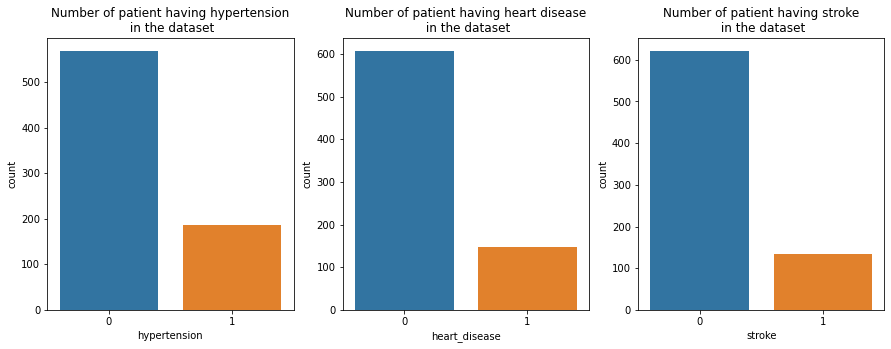

In [18]:
df_age = df.loc[df['age'].between(70, 90)]
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize =(15,5) )
sns.countplot(x='hypertension', data=df_age, ax=ax1)
sns.countplot(x='heart_disease', data=df_age, ax=ax2)
sns.countplot(x='stroke', data=df_age, ax=ax3)
ax1.set_title("Number of patient having hypertension\n in the dataset")
ax2.set_title("Number of patient having heart disease\n in the dataset")
ax3.set_title("Number of patient having stroke\n in the dataset")
plt.show()

## 70 ir daugiau

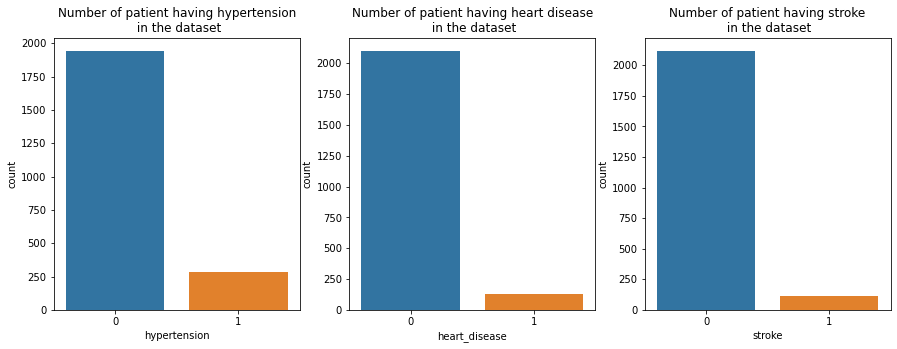

In [19]:
df_age = df.loc[df['age'].between(40, 70)]
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize =(15,5) )
sns.countplot(x='hypertension', data=df_age, ax=ax1)
sns.countplot(x='heart_disease', data=df_age, ax=ax2)
sns.countplot(x='stroke', data=df_age, ax=ax3)
ax1.set_title("Number of patient having hypertension\n in the dataset")
ax2.set_title("Number of patient having heart disease\n in the dataset")
ax3.set_title("Number of patient having stroke\n in the dataset")
plt.show()

## 40 - 70

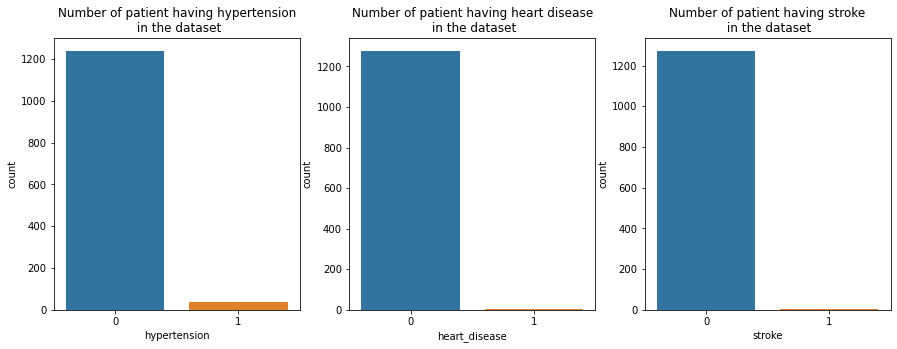

In [20]:
df_age = df.loc[df['age'].between(20, 40)]
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize =(15,5) )
sns.countplot(x='hypertension', data=df_age, ax=ax1)
sns.countplot(x='heart_disease', data=df_age, ax=ax2)
sns.countplot(x='stroke', data=df_age, ax=ax3)
ax1.set_title("Number of patient having hypertension\n in the dataset")
ax2.set_title("Number of patient having heart disease\n in the dataset")
ax3.set_title("Number of patient having stroke\n in the dataset")
plt.show()

## 20 - 40

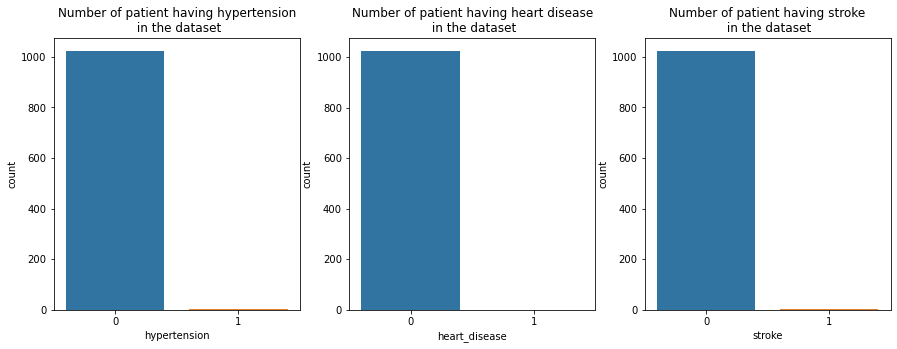

In [21]:
df_age = df.loc[df['age'].between(0, 20)]
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize =(15,5) )
sns.countplot(x='hypertension', data=df_age, ax=ax1)
sns.countplot(x='heart_disease', data=df_age, ax=ax2)
sns.countplot(x='stroke', data=df_age, ax=ax3)
ax1.set_title("Number of patient having hypertension\n in the dataset")
ax2.set_title("Number of patient having heart disease\n in the dataset")
ax3.set_title("Number of patient having stroke\n in the dataset")
plt.show()

## iki 20

In [22]:
df['stroke'].value_counts().sort_index()

0    4861
1     249
Name: stroke, dtype: int64

In [23]:
df['heart_disease'].value_counts().sort_index()

0    4834
1     276
Name: heart_disease, dtype: int64

In [24]:
df['hypertension'].value_counts().sort_index()

0    4612
1     498
Name: hypertension, dtype: int64

## Ligų skaičius duomenyse, santykinai nedidelis

In [25]:
df['male'] = (df['gender'] == "Male").astype(int)
df['urban'] = (df['Residence_type'] == "Urban").astype(int)
df['married'] = (df['ever_married'] == "Yes").astype(int)
df['smoking'] = (df['smoking_status'] == "smokes").astype(int)
df['formerly_smoked'] = (df['smoking_status'] == "formerly smoked").astype(int)
df['never_smoked'] = (df['smoking_status'] == "never smoked").astype(int)
df['govt_job'] = (df['work_type'] == "Govt_job").astype(int)
df['never_worked'] = (df['work_type'] == "Never_worked").astype(int)
df['private'] = (df['work_type'] == "Private").astype(int)
df['self_employed'] = (df['work_type'] == "Self-employed").astype(int)
df['bmi_nan'] = (df['bmi'] == "NaN").astype(int)

In [26]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df = df.drop_duplicates()

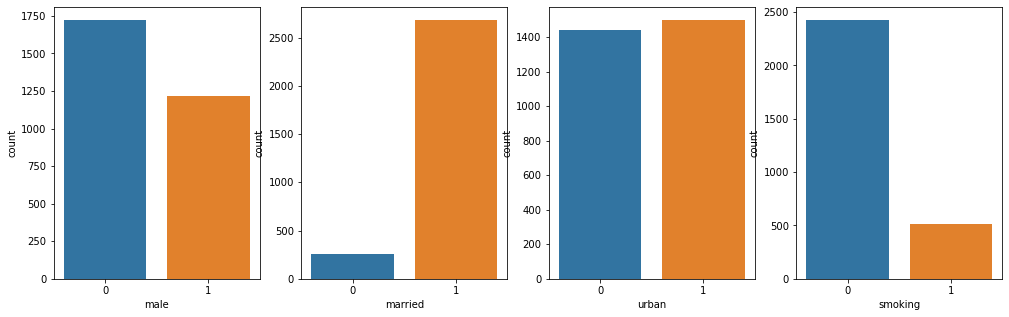

In [27]:
df_age2 = df.loc[df['age'].between(40, 90)]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=False, figsize =(17,5) )
sns.countplot(x='male', data=df_age2, ax=ax1)
sns.countplot(x='married', data=df_age2, ax=ax2)
sns.countplot(x='urban', data=df_age2, ax=ax3)
sns.countplot(x='smoking', data=df_age2, ax=ax4)
plt.show()

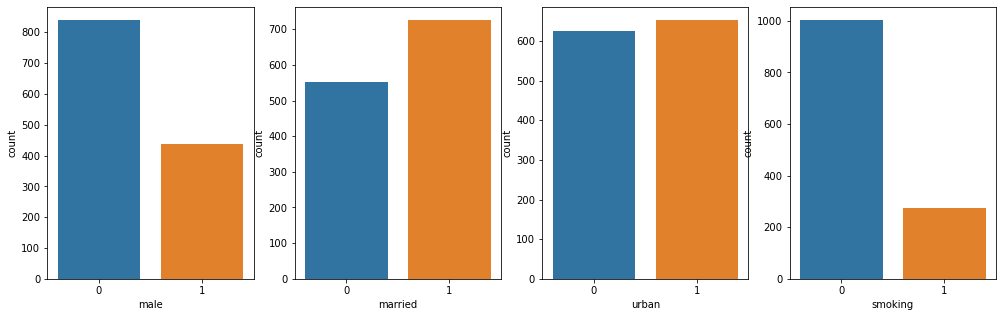

In [28]:
df_age2 = df.loc[df['age'].between(20, 40)]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=False, figsize =(17,5) )
sns.countplot(x='male', data=df_age2, ax=ax1)
sns.countplot(x='married', data=df_age2, ax=ax2)
sns.countplot(x='urban', data=df_age2, ax=ax3)
sns.countplot(x='smoking', data=df_age2, ax=ax4)
plt.show()

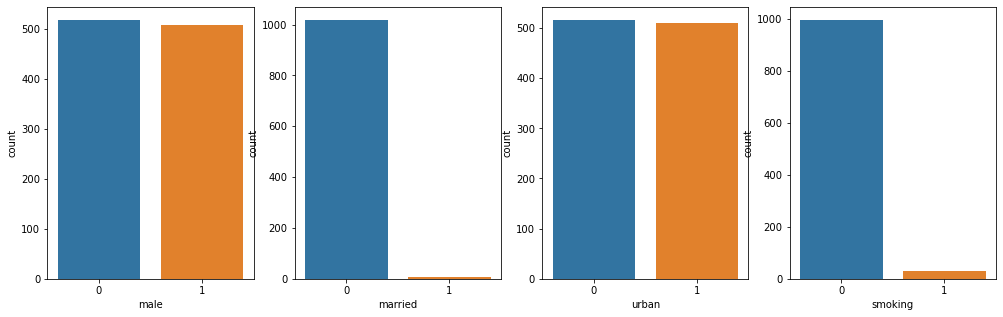

In [29]:
df_age2 = df.loc[df['age'].between(0, 20)]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=False, figsize =(17,5) )
sns.countplot(x='male', data=df_age2, ax=ax1)
sns.countplot(x='married', data=df_age2, ax=ax2)
sns.countplot(x='urban', data=df_age2, ax=ax3)
sns.countplot(x='smoking', data=df_age2, ax=ax4)
plt.show()

### Atrodo jaunų mergaičių duomenyse daugiau, o vedybų faktorius ryškus tarp vyresnių

In [30]:
numeric_col = ['age', 'avg_glucose_level', 'bmi']
df[numeric_col].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
min_max_scaler = MinMaxScaler()
df[numeric_col] = min_max_scaler.fit_transform(df[numeric_col])
df[numeric_col].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,0.526692,0.235563,0.212624
std,0.276033,0.209046,0.088197
min,0.000000,0.000000,0.000000
25%,0.304199,0.102137,0.154639
50%,0.548340,0.169721,0.203895
75%,0.743652,0.272228,0.257732
max,1.000000,1.000000,1.000000


#### kategoriniu duomenu sutvarkymas, bmi NaN reiksmiu pataisa, skaitiniu reiksmiu suvedimas i diapazona 1-0

## Logistinė regresija

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
        'male', 'urban', 'married', 'smoking',
       'formerly_smoked', 'never_smoked', 'govt_job', 'never_worked',
       'private', 'self_employed', 'bmi_nan']
X = df[columns]
y = df['stroke']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

logistic1 = LogisticRegression(class_weight = {0:1,1:2})#class_weight = 'balanced'
logistic1.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 2})

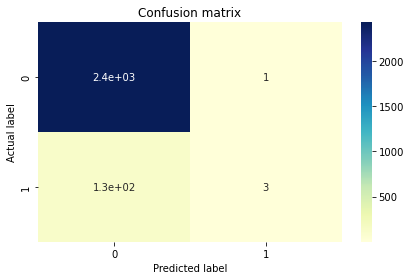

In [35]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [36]:
print('Precision:\t\t', metrics.precision_score(y_test, predictions))
print('Recall:\t\t\t', metrics.recall_score(y_test, predictions))
print('Accuracy:\t\t', metrics.accuracy_score(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

Precision:		 0.75
Recall:			 0.023255813953488372
Accuracy:		 0.950293542074364
Area under the curve:	 0.5114218063996626


In [37]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2426
           1       0.75      0.02      0.05       129

    accuracy                           0.95      2555
   macro avg       0.85      0.51      0.51      2555
weighted avg       0.94      0.95      0.93      2555

Area under the curve:	 0.5114218063996626


In [38]:
coeff_df = pd.DataFrame(logistic1.coef_[0], X.columns, columns=['stroke'])
coeff_df.round(2)

,stroke
age,5.08
hypertension,0.23
heart_disease,0.37
avg_glucose_level,0.90
bmi,0.03
male,0.12
urban,0.21
married,-0.21
smoking,0.28
formerly_smoked,-0.01


In [39]:
df_age4 = df.loc[df['age'].between(0.1, 1)]

In [40]:
columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
        'male', 'urban', 'married', 'smoking',
       'formerly_smoked', 'never_smoked', 'govt_job', 'never_worked',
       'private', 'self_employed', 'bmi_nan']
X = df_age4[columns]
y = df_age4['stroke']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logistic1 = LogisticRegression(class_weight = {0:1,1:7})#class_weight = 'balanced'{0:1,1:2}
logistic1.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 7})

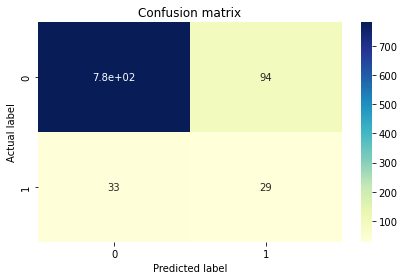

In [42]:
predictions = logistic1.predict(X_test)
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.tight_layout()

In [43]:
print('Precision:\t\t', metrics.precision_score(y_test, predictions))
print('Recall:\t\t\t', metrics.recall_score(y_test, predictions))
print('Accuracy:\t\t', metrics.accuracy_score(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

Precision:		 0.23577235772357724
Recall:			 0.46774193548387094
Accuracy:		 0.8643162393162394
Area under the curve:	 0.6800952240348417


In [44]:
predictions = logistic1.predict(X_test)
print(classification_report(y_test, predictions))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       874
           1       0.24      0.47      0.31        62

    accuracy                           0.86       936
   macro avg       0.60      0.68      0.62       936
weighted avg       0.91      0.86      0.88       936

Area under the curve:	 0.6800952240348417


In [45]:
coeff_df = pd.DataFrame(logistic1.coef_[0], X.columns, columns=['stroke'])
coeff_df.round(2)

,stroke
age,5.76
hypertension,0.64
heart_disease,0.32
avg_glucose_level,0.78
bmi,-0.43
male,-0.14
urban,0.12
married,-0.31
smoking,0.26
formerly_smoked,0.27


### Spėjimo moduliai parodo, tam tikrą teisingą numatymo procentą, bet praktikoje tai nebūtų reikšminga, analizė parodo tiek insulto tiek kitų ligų kaip svarbių faktorių santykinai mažą skaičių duomenyse. Prašosi pritaikomi papildomai kiti algoritmai didelio disbalanso duomenims sutvarkyti ir moduliui sukurti. Labai pasikeičia modulio spėjimai izoliavus vaikų grupę. Pastebimas reikšmingas ligų gausumas vyresniame amžiuje. Padarytos įžvalgos bendra duomenų sąryšių prasme. 
### „Įsigilink į bet ką ir rasi matematiką“. — Dekanas Šlicteris
### Jei nežinai, kaip užduoti teisingą klausimą, nieko neatrasi. – V. Edvardas Demingas
### Bet jau žinom kiek daug galima nuveikti su PHYTON duomenų pasaulyje !